In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
train_data=pd.read_excel('Data_Train.xlsx')

In [3]:
pd.set_option('display.max_columns',None)#to display all the columns
train_data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
train_data.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
len(train_data)

10683

In [8]:
train_data=train_data.dropna()
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
len(train_data)

10682

In [10]:
train_data.Duration.value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [11]:
train_data.index=[i for i in range(len(train_data))]

# EDA

In [12]:
train_data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [13]:
train_data['Date_of_Journey']=pd.to_datetime(train_data['Date_of_Journey'])

In [14]:
train_data['Journey Date']=train_data['Date_of_Journey'].dt.day
train_data['Journey Month']=train_data['Date_of_Journey'].dt.month
train_data['Journey Year']=train_data['Date_of_Journey'].dt.year

In [15]:
train_data.drop('Date_of_Journey',axis=1,inplace=True)
train_data.head(5)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey Date,Journey Month,Journey Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,2019


In [16]:
train_data.Dep_Time

0        22:20
1        05:50
2        09:25
3        18:05
4        16:50
         ...  
10677    19:55
10678    20:45
10679    08:20
10680    11:30
10681    10:55
Name: Dep_Time, Length: 10682, dtype: object

In [17]:
train_data['Dep_Time']=pd.to_datetime(train_data['Dep_Time'])
train_data['Dep_Time_hr']=train_data['Dep_Time'].dt.hour
train_data['Dep_Time_min']=train_data['Dep_Time'].dt.minute

In [18]:
train_data.drop('Dep_Time',axis=1,inplace=True)
train_data.head(5)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey Date,Journey Month,Journey Year,Dep_Time_hr,Dep_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,2019,16,50


In [19]:
train_data['Arrival_Time']=pd.to_datetime(train_data['Arrival_Time'])
train_data['Arrival_Time_hr']=train_data['Arrival_Time'].dt.hour
train_data['Arrival_Time_min']=train_data['Arrival_Time'].dt.minute

In [20]:
train_data.drop('Arrival_Time',axis=1,inplace=True)
train_data.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey Date,Journey Month,Journey Year,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35


In [21]:
train_data.Duration

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10677    2h 30m
10678    2h 35m
10679        3h
10680    2h 40m
10681    8h 20m
Name: Duration, Length: 10682, dtype: object

In [22]:
for i in range(len(train_data)):
    if(train_data.loc[i]['Duration'].find('m')==-1):
        train_data.loc[[i],['Duration']]=train_data.loc[i]['Duration']+' 00m'
    if(train_data.loc[i]['Duration'].find('h')==-1):
        train_data.loc[[i],['Duration']]='0h '+train_data.loc[i]['Duration']

In [23]:
for i in range(len(train_data.Duration)):
    train_data.loc[[i],['duration_hr']]=int(train_data.loc[i]['Duration'].split('h')[0])

In [24]:
for i in range(len(train_data.Duration)):
    train_data.loc[[i],['duration_min']]=int(train_data.loc[i]['Duration'].split(' ')[1].split('m')[0])

In [25]:
train_data.drop(['Duration'],axis=1,inplace=True)

In [26]:
train_data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey Date,Journey Month,Journey Year,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2.0,50.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,2019,5,50,13,15,7.0,25.0


In [27]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10681
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           10682 non-null  object 
 1   Source            10682 non-null  object 
 2   Destination       10682 non-null  object 
 3   Route             10682 non-null  object 
 4   Total_Stops       10682 non-null  object 
 5   Additional_Info   10682 non-null  object 
 6   Price             10682 non-null  int64  
 7   Journey Date      10682 non-null  int64  
 8   Journey Month     10682 non-null  int64  
 9   Journey Year      10682 non-null  int64  
 10  Dep_Time_hr       10682 non-null  int64  
 11  Dep_Time_min      10682 non-null  int64  
 12  Arrival_Time_hr   10682 non-null  int64  
 13  Arrival_Time_min  10682 non-null  int64  
 14  duration_hr       10682 non-null  float64
 15  duration_min      10682 non-null  float64
dtypes: float64(2), int64(8), object(6)
memor

In [28]:
train_data.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [29]:
df_airline=pd.get_dummies(train_data.Airline,drop_first=True)

In [30]:
df_source=pd.get_dummies(train_data.Source,drop_first=True)

In [31]:
df_destination=pd.get_dummies(train_data.Destination,drop_first=True)

In [32]:
train_data=pd.concat([train_data,df_airline,df_source,df_destination],axis=1)

In [33]:
train_data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey Date,Journey Month,Journey Year,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,duration_hr,duration_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2.0,50.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,2019,5,50,13,15,7.0,25.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [34]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10681
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Airline                            10682 non-null  object 
 1   Source                             10682 non-null  object 
 2   Destination                        10682 non-null  object 
 3   Route                              10682 non-null  object 
 4   Total_Stops                        10682 non-null  object 
 5   Additional_Info                    10682 non-null  object 
 6   Price                              10682 non-null  int64  
 7   Journey Date                       10682 non-null  int64  
 8   Journey Month                      10682 non-null  int64  
 9   Journey Year                       10682 non-null  int64  
 10  Dep_Time_hr                        10682 non-null  int64  
 11  Dep_Time_min                       10682 non-null  int

In [35]:
train_data.head(5)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey Date,Journey Month,Journey Year,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,duration_hr,duration_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2.0,50.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,2019,5,50,13,15,7.0,25.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,2019,9,25,4,25,19.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,2019,18,5,23,30,5.0,25.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,2019,16,50,21,35,4.0,45.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [36]:
#here we can see that the route and total stops have a strong relation between them..
train_data.drop('Route',axis=1,inplace=True)

In [37]:
train_data.Additional_Info.value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [38]:
8344/sum(train_data.Additional_Info.value_counts())
#nearly 80% of Additional_Info is No info thus we can drop Additional_Info

0.781127129750983

In [39]:
train_data.drop('Additional_Info',axis=1,inplace=True)

In [40]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10681
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Airline                            10682 non-null  object 
 1   Source                             10682 non-null  object 
 2   Destination                        10682 non-null  object 
 3   Total_Stops                        10682 non-null  object 
 4   Price                              10682 non-null  int64  
 5   Journey Date                       10682 non-null  int64  
 6   Journey Month                      10682 non-null  int64  
 7   Journey Year                       10682 non-null  int64  
 8   Dep_Time_hr                        10682 non-null  int64  
 9   Dep_Time_min                       10682 non-null  int64  
 10  Arrival_Time_hr                    10682 non-null  int64  
 11  Arrival_Time_min                   10682 non-null  int

In [41]:
train_data.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [42]:
#As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys
train_data=train_data.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})
train_data

,Airline,Source,Destination,Total_Stops,Price,Journey Date,Journey Month,Journey Year,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,duration_hr,duration_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2.0,50.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,5,1,2019,5,50,13,15,7.0,25.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,6,9,2019,9,25,4,25,19.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,2019,18,5,23,30,5.0,25.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,3,1,2019,16,50,21,35,4.0,45.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,0,4107,4,9,2019,19,55,22,25,2.0,30.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10678,Air India,Kolkata,Banglore,0,4145,27,4,2019,20,45,23,20,2.0,35.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,Jet Airways,Banglore,Delhi,0,7229,27,4,2019,8,20,11,20,3.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10680,Vistara,Banglore,New Delhi,0,12648,3,1,2019,11,30,14,10,2.0,40.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [43]:
train_data.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [44]:
train_data

,Total_Stops,Price,Journey Date,Journey Month,Journey Year,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,duration_hr,duration_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,2019,22,20,1,10,2.0,50.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,2019,5,50,13,15,7.0,25.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,6,9,2019,9,25,4,25,19.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,12,2019,18,5,23,30,5.0,25.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,3,1,2019,16,50,21,35,4.0,45.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,0,4107,4,9,2019,19,55,22,25,2.0,30.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10678,0,4145,27,4,2019,20,45,23,20,2.0,35.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,0,7229,27,4,2019,8,20,11,20,3.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10680,0,12648,3,1,2019,11,30,14,10,2.0,40.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [45]:
#now we need to perform the same set of operations on test data..
#we have not done combinedly because there might be a chance of data leaking which in turn will result in overfittnig

## test data set

In [46]:
test_data=pd.read_excel('Test_set.xlsx')

In [47]:
test_data=test_data.dropna()
test_data.isnull().sum()
test_data.index=[i for i in range(len(test_data))]
test_data['Date_of_Journey']=pd.to_datetime(test_data['Date_of_Journey'])
test_data['Journey Date']=test_data['Date_of_Journey'].dt.day
test_data['Journey Month']=test_data['Date_of_Journey'].dt.month
test_data['Journey Year']=test_data['Date_of_Journey'].dt.year
test_data.drop('Date_of_Journey',axis=1,inplace=True)
test_data.head(5)
test_data['Arrival_Time']=pd.to_datetime(test_data['Arrival_Time'])
test_data['Arrival_Time_hr']=test_data['Arrival_Time'].dt.hour
test_data['Arrival_Time_min']=test_data['Arrival_Time'].dt.minute
test_data.drop('Arrival_Time',axis=1,inplace=True)
test_data.head(5)
for i in range(len(test_data)):
    if(test_data.loc[i]['Duration'].find('m')==-1):
        test_data.loc[[i],['Duration']]=test_data.loc[i]['Duration']+' 00m'
    if(test_data.loc[i]['Duration'].find('h')==-1):
        test_data.loc[[i],['Duration']]='0h '+test_data.loc[i]['Duration']
for i in range(len(test_data.Duration)):
    test_data.loc[[i],['duration_hr']]=int(test_data.loc[i]['Duration'].split('h')[0])
for i in range(len(test_data.Duration)):
    test_data.loc[[i],['duration_min']]=int(test_data.loc[i]['Duration'].split(' ')[1].split('m')[0])
test_data.drop(['Duration'],axis=1,inplace=True)
df_airline=pd.get_dummies(test_data.Airline,drop_first=True)
df_source=pd.get_dummies(test_data.Source,drop_first=True)
df_destination=pd.get_dummies(test_data.Destination,drop_first=True)
test_data=pd.concat([test_data,df_airline,df_source,df_destination],axis=1)
test_data.drop('Route',axis=1,inplace=True)
test_data.drop('Additional_Info',axis=1,inplace=True)
test_data=test_data.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})
test_data['Dep_Time']=pd.to_datetime(test_data['Dep_Time'])
test_data['Dep_Time_hr']=test_data['Dep_Time'].dt.hour
test_data['Dep_Time_min']=test_data['Dep_Time'].dt.minute
test_data.drop('Dep_Time',axis=1,inplace=True)
test_data.drop(['Airline','Source','Destination'],axis=1,inplace=True)
test_data

,Total_Stops,Journey Date,Journey Month,Journey Year,Arrival_Time_hr,Arrival_Time_min,duration_hr,duration_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Dep_Time_hr,Dep_Time_min
0,1,6,6,2019,4,25,10.0,55.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,17,30
1,1,5,12,2019,10,20,4.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6,20
2,1,21,5,2019,19,0,23.0,45.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,19,15
3,1,21,5,2019,21,0,13.0,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,8,0
4,0,24,6,2019,2,45,2.0,50.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,23,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,6,6,2019,20,25,23.0,55.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,20,30
2667,0,27,3,2019,16,55,2.0,35.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,14,20
2668,1,3,6,2019,4,25,6.0,35.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,21,50
2669,1,3,6,2019,19,15,15.0,15.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,4,0


In [48]:
train_data.columns

Index(['Total_Stops', 'Price', 'Journey Date', 'Journey Month', 'Journey Year',
       'Dep_Time_hr', 'Dep_Time_min', 'Arrival_Time_hr', 'Arrival_Time_min',
       'duration_hr', 'duration_min', 'Air India', 'GoAir', 'IndiGo',
       'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [49]:
test_data.columns

Index(['Total_Stops', 'Journey Date', 'Journey Month', 'Journey Year',
       'Arrival_Time_hr', 'Arrival_Time_min', 'duration_hr', 'duration_min',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata',
       'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi',
       'Dep_Time_hr', 'Dep_Time_min'],
      dtype='object')

## feature selection

In [50]:
x=train_data.drop(['Price'],axis=1)
y=train_data.Price

In [51]:
train_data.corr()

,Total_Stops,Price,Journey Date,Journey Month,Journey Year,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min,duration_hr,duration_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Total_Stops,1.000000,0.603897,-0.024136,0.065495,NaN,-0.061476,-0.002618,0.038140,-0.106940,0.739916,-0.136706,0.271094,-0.060110,-0.302991,0.215063,0.017876,0.118399,0.009089,-0.274351,0.002519,-0.120447,-0.020459,-0.234758,0.490170,0.032761,-0.260752,0.490170,-0.447390,-0.260752,-0.234758,-0.015302
Price,0.603897,1.000000,-0.165448,0.010705,NaN,0.006799,-0.024458,0.024244,-0.086155,0.508778,-0.124855,0.050432,-0.095151,-0.361070,0.416124,0.253303,0.139793,0.017650,-0.296565,-0.010381,-0.060654,-0.000454,-0.179223,0.270676,0.009358,-0.230755,0.270676,-0.313417,-0.230755,-0.179223,0.189777
Journey Date,-0.024136,-0.165448,1.000000,-0.264896,NaN,-0.002301,-0.016433,-0.002176,-0.021423,-0.037964,-0.007708,-0.037279,0.002350,0.013223,-0.028387,-0.026075,0.048638,0.032978,0.030767,-0.010643,-0.015935,-0.017801,0.012202,0.112092,-0.068380,-0.013391,0.112092,0.011489,-0.013391,0.012202,-0.098370
Journey Month,0.065495,0.010705,-0.264896,1.000000,NaN,0.028189,0.002136,-0.004329,-0.025786,0.055552,-0.018597,-0.000281,-0.017538,-0.037203,0.057818,-0.026727,-0.002737,-0.029617,-0.032454,0.001507,0.002856,-0.012351,-0.014993,0.008017,0.063601,-0.015696,0.008017,0.008880,-0.015696,-0.014993,-0.100533
Journey Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dep_Time_hr,-0.061476,0.006799,-0.002301,0.028189,NaN,1.000000,-0.024745,0.005180,0.067911,0.002869,-0.023707,-0.012879,-0.016373,-0.023395,0.113942,-0.007524,-0.149992,-0.028672,-0.010451,0.000857,0.023906,-0.003375,-0.014846,-0.118780,0.155471,-0.017292,-0.118780,0.009469,-0.017292,-0.014846,-0.022138
Dep_Time_min,-0.002618,-0.024458,-0.016433,0.002136,NaN,-0.024745,1.000000,0.043122,-0.017597,-0.022104,0.092485,-0.045688,0.076751,-0.014714,0.024455,0.009168,-0.109370,-0.004624,0.092634,-0.010007,-0.077903,-0.011380,0.067110,-0.085534,-0.024238,0.037705,-0.085534,0.003200,0.037705,0.067110,0.107129
Arrival_Time_hr,0.038140,0.024244,-0.002176,-0.004329,NaN,0.005180,0.043122,1.000000,-0.154363,0.055276,-0.118309,0.088872,0.018526,-0.071491,-0.027377,-0.014456,0.067930,0.013491,-0.090058,0.003739,0.068834,0.000776,-0.014795,-0.006790,0.054693,-0.033512,-0.006790,-0.030867,-0.033512,-0.014795,0.000366
Arrival_Time_min,-0.106940,-0.086155,-0.021423,-0.025786,NaN,0.067911,-0.017597,-0.154363,1.000000,-0.074450,0.151628,0.061231,0.096839,0.035124,-0.057698,0.005232,-0.167455,-0.001786,0.012543,-0.002750,0.069422,0.000314,-0.030493,-0.209882,0.118573,0.081196,-0.209882,0.095250,0.081196,-0.030493,0.021271
duration_hr,0.739916,0.508778,-0.037964,0.055552,NaN,0.002869,-0.022104,0.055276,-0.074450,1.000000,-0.126468,0.261707,-0.094044,-0.346230,0.307196,-0.011847,-0.008070,-0.002271,-0.263844,-0.008253,-0.020358,-0.016268,-0.186668,0.299819,0.123524,-0.233326,0.299819,-0.346192,-0.233326,-0.186668,0.004052


<AxesSubplot:>

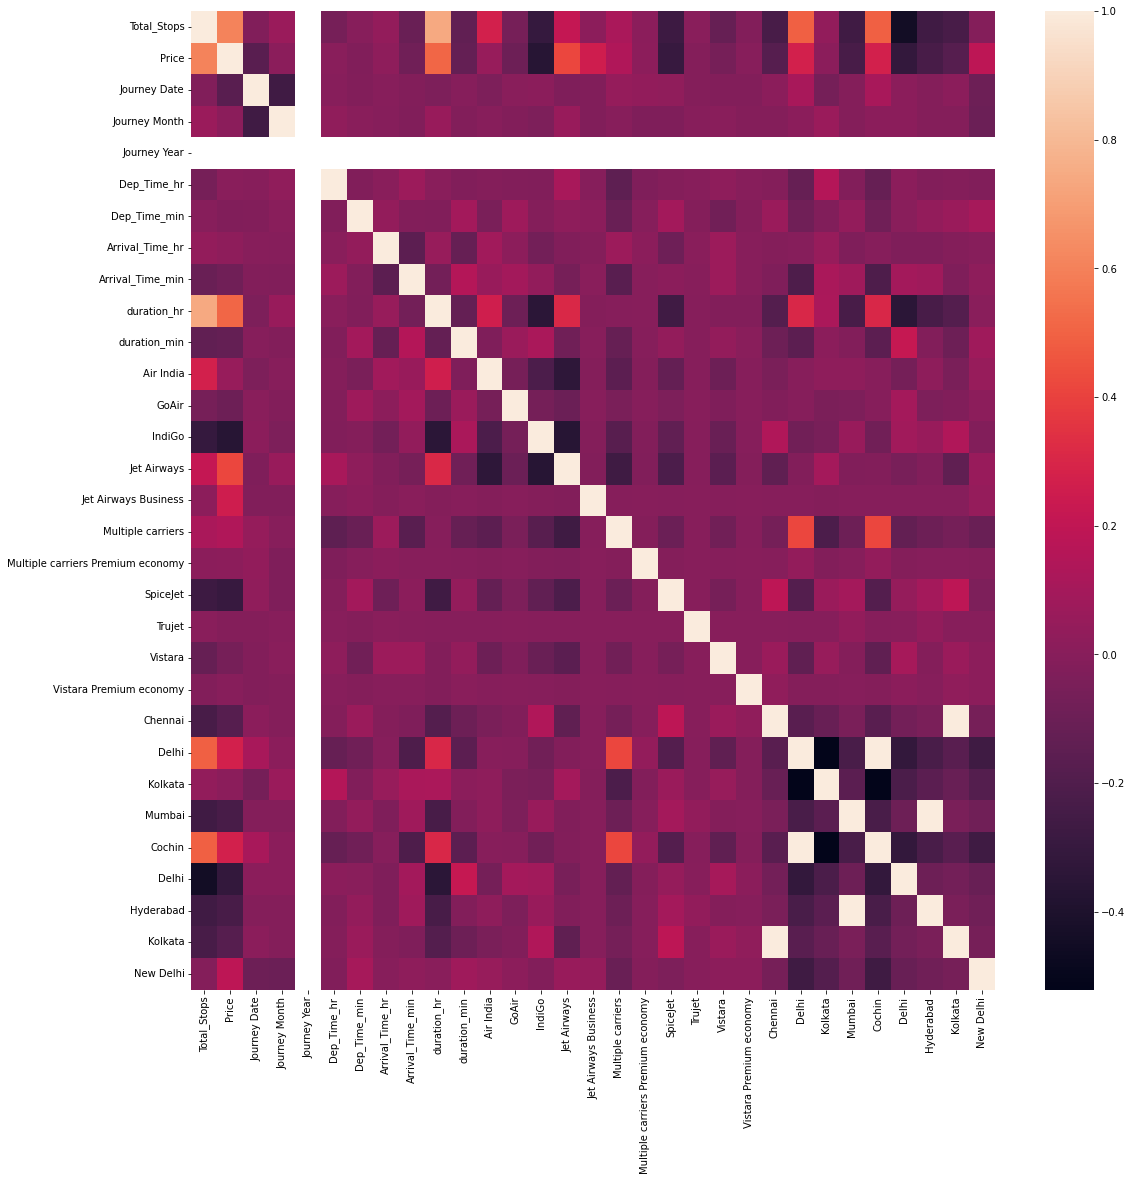

In [52]:
plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr())

In [53]:
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(x,y)

#Difference between ExtraTreeRegressor and RandomForest
#1. in extratreeregressor featres are selected without relacement while this is not the case with randomforest.
#2. split is not doe on the basis of the best fit point selected throgh entropy and IG but is done randomly.
#3. on noisy features : ExtraTree is better than RandomForest
#4. on appropriate features : ExtraTree is equivalent to RandomForest

ExtraTreesRegressor()

In [54]:
print(selection.feature_importances_)

[2.48755494e-01 1.08564855e-01 8.53258982e-02 0.00000000e+00
 2.57201016e-02 2.20730563e-02 2.88934567e-02 2.06960100e-02
 9.60703676e-02 1.76863742e-02 9.18289156e-03 1.91622001e-03
 1.88393997e-02 1.47637076e-01 6.68057658e-02 1.84253574e-02
 9.80703747e-04 3.55668948e-03 1.10027358e-04 5.12591810e-03
 1.36550737e-04 4.60521686e-04 8.54747052e-03 4.31370211e-03
 6.31306536e-03 8.26439172e-03 1.53875063e-02 6.79148560e-03
 5.68433581e-04 2.28512090e-02]


In [55]:
feat_importance=pd.Series(selection.feature_importances_,index=x.columns)
feat_importance

Total_Stops                          0.248755
Journey Date                         0.108565
Journey Month                        0.085326
Journey Year                         0.000000
Dep_Time_hr                          0.025720
Dep_Time_min                         0.022073
Arrival_Time_hr                      0.028893
Arrival_Time_min                     0.020696
duration_hr                          0.096070
duration_min                         0.017686
Air India                            0.009183
GoAir                                0.001916
IndiGo                               0.018839
Jet Airways                          0.147637
Jet Airways Business                 0.066806
Multiple carriers                    0.018425
Multiple carriers Premium economy    0.000981
SpiceJet                             0.003557
Trujet                               0.000110
Vistara                              0.005126
Vistara Premium economy              0.000137
Chennai                           

<AxesSubplot:>

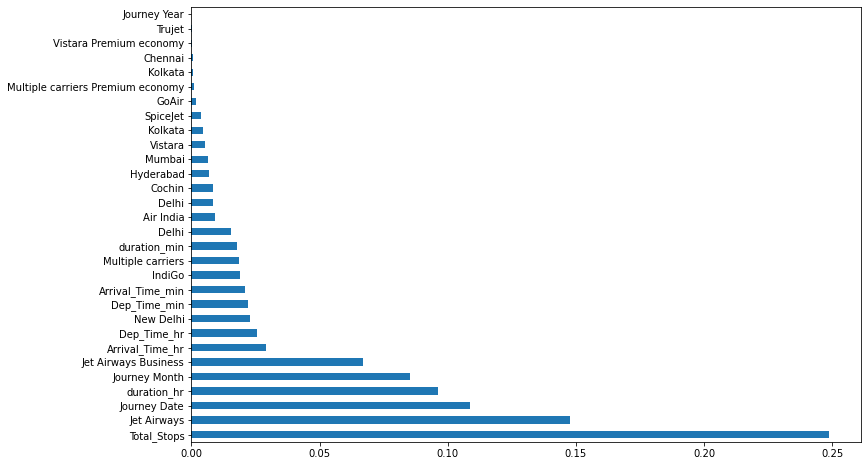

In [56]:
plt.figure(figsize=(12,8))
feat_importance.nlargest(30).plot(kind='barh')
#n largest Returns the first n rows ordered by columns in descending order.

In [57]:
train_data.drop(['Journey Year'],axis=1,inplace=True)

In [58]:
test_data.drop(['Journey Year'],axis=1,inplace=True)

## train_test_split and model training

In [59]:
from sklearn.model_selection import train_test_split
tr_dt,tst_dt=train_test_split(train_data,test_size=0.2,random_state=42)
x_train=tr_dt.drop(['Price'],axis=1)
y_train=tr_dt.Price
y_train=y_train.values.reshape(-1,1)
x_test=tst_dt.drop(['Price'],axis=1)
y_test=tst_dt.Price
y_test=y_test.values.reshape(-1,1)

In [60]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8545, 29)
(8545, 1)
(2137, 29)
(2137, 1)


In [61]:
from sklearn.linear_model import LinearRegression
model_1=LinearRegression()
model_1.fit(x_train,y_train)
print(model_1.score(x_train,y_train))
print(model_1.score(x_test,y_test))
#model.score returns the coefficient of determination of the prediction.
'''
R^2	=	coefficient of determination
RSS	=	sum of squares of residuals
TSS	=	total sum of squares
R^2=1-(RSS)/(TSS)'''

0.6180995099750229
0.6165577514521259


'\nR^2\t=\tcoefficient of determination\nRSS\t=\tsum of squares of residuals\nTSS\t=\ttotal sum of squares\nR^2=1-(RSS)/(TSS)'

In [62]:
from sklearn.tree import DecisionTreeRegressor
model_2=DecisionTreeRegressor()
model_2.fit(x_train,y_train)
print(model_2.score(x_train,y_train))
print(model_2.score(x_test,y_test))

0.9692484150527355
0.7255844860163254


In [63]:
from sklearn.ensemble import RandomForestRegressor
model_3=RandomForestRegressor()
model_3.fit(x_train,y_train)
print(model_3.score(x_train,y_train))
print(model_3.score(x_test,y_test))

C:\Users\Hp\AppData\Local\Temp/ipykernel_4600/418504201.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_3.fit(x_train,y_train)


0.9524002343467102
0.7889519886694604


In [64]:
a=model_3.predict(x_test)
#here a is our predicted value

C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

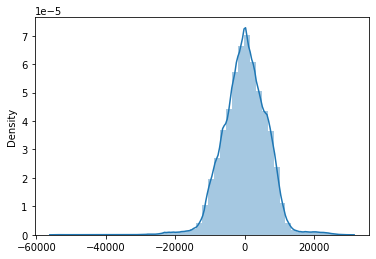

In [65]:
sns.distplot(a-y_test)#here a is the predicted value of x_train 
#graph forming the gaussian distribution that means we are having very good datasets

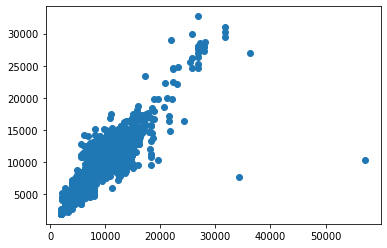

In [66]:
plt.scatter(y_test,a)

In [67]:
from sklearn import metrics
metrics.r2_score(y_test,a)

0.7889519886694604

In [68]:
from sklearn.model_selection import RandomizedSearchCV

In [69]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [70]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [71]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = model_3, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [72]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.6s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.5s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.4s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.8s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.6s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   8.9s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   9.8s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  11.6s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   9.3s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   9.4s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   5.9s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   6.4s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   8.2s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   6.2s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   6.8s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  11.0s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  10.7s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  10.0s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  11.5s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   9.9s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  18.0s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  16.9s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  18.3s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  17.0s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  16.7s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  15.0s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  16.4s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  14.9s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  17.1s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  14.7s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   4.6s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   5.2s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   5.2s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   5.3s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   4.8s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   2.4s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   2.5s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   2.5s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   2.4s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   2.3s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   3.2s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   3.2s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   3.2s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   2.9s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   3.1s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  20.3s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  19.9s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  20.0s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  19.7s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  19.7s


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [73]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [74]:
prediction = rf_random.predict(x_test)

In [ ]:
rf_random.score(x_test,prediction)

In [ ]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [ ]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
#Saving the model..
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)